## Robot Intelligence 7: Planning and Heuristics




### On Motion Planning

The motion planning problem can be reformulated as a weighted-graph search problem.

In graph search, we have

* a graph $G = (V, E)$, where $V = \{v_1, \dots\}$ is a set of *vertices* or *nodes*, and $E = \{(v_i, v_j), \dots\}$ is a set of directed *edges*
* a *source* or *start* vertex $v_{start} \in V$
* a *target* or *goal* vertex $v_{target} \in V$
* a cost function $c: E \mapsto \mathbb{R}^+$, which maps edges in the graph to non-negative associated *costs* or *weights*.

Our goal is to find the minimum-cost path from $v_{start}$ to $v_{target}$.

One famous algorithm that optimally solves this problem is **Dijkstra's algorithm**.

Dijkstra's algorithm crucially employs a priority queue as its central data structure.

The full pseudocode for the algorithm is below.

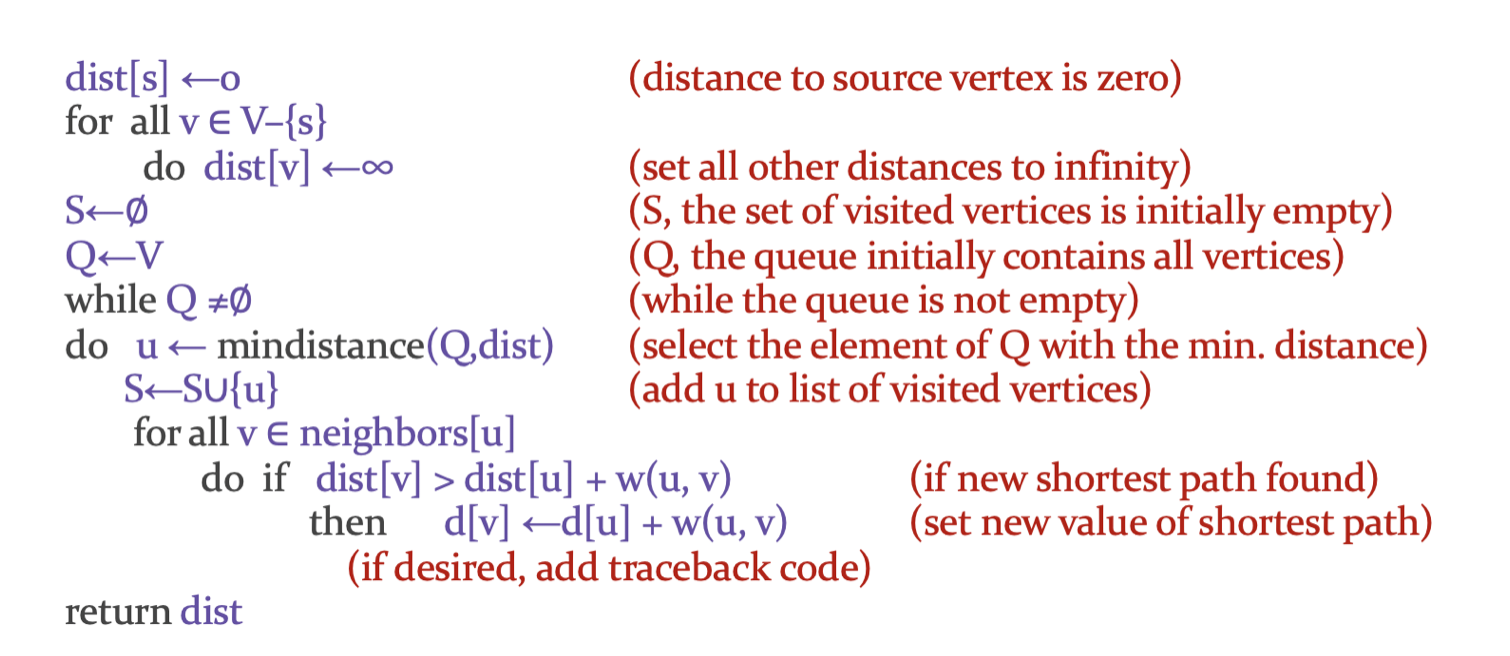

### Dijkstra In-Practice

Now, we'll see Dijkstra's algorthm in practice for a simple problem.

We'll use a simple (and suboptimal) Python *dictionary* as our priority queue.

In [1]:
from collections import deque

class Graph:
    def __init__(self, data_source):
        self.nodes = []
        self.adjacency_list = {}
        for line in data_source:

          u, v, cost, *_ = line.strip().split(" ")
          cost = float(cost)

          if not u in self.nodes:
            self.nodes += [u]

          if not v in self.nodes:
            self.nodes += [v]

          if not u in self.adjacency_list:
            self.adjacency_list[u] = [(v, cost)]
          else:
            self.adjacency_list[u] += [(v, cost)]

        for node in self.nodes:
          if not node in self.adjacency_list:
            self.adjacency_list[node] = []

        self.adjacency_list = {node: set(edges) for (node, edges) in self.adjacency_list.items()}
        

    def dijkstra_shortest_path(self, start_node, end_node):
        unvisited_nodes = set(self.nodes.copy())  

        # Create a dictionary of each node's distance from start_node. We will
        # update each node's distance whenever we find a shorter path.
        distance_from_start = {
            node: 0 if node == start_node else float('inf') for node in self.nodes
        }

        # Initialize previous_node, the dictionary that maps each node to the
        # node it was visited from when the the shortest path to it was found.
        previous_node = {node: None for node in self.nodes}

        while unvisited_nodes:
            # Set current_node to the unvisited node with shortest distance
            # calculated so far.
            current_node = min(
                unvisited_nodes, key=lambda node: distance_from_start[node]
            )
            unvisited_nodes.remove(current_node)

            # If current_node's distance is infinite, the remaining unvisited
            # nodes are not connected to start_node, so we're done.
            if distance_from_start[current_node] == float('inf'):
                break

            # For each neighbor of current_node, check whether the total distance
            # to the neighbor via current_node is shorter than the distance we
            # currently have for that node. If it is, update the neighbor's values
            # for distance_from_start and previous_node.
            for neighbor, distance in self.adjacency_list[current_node]:
                new_path = distance_from_start[current_node] + distance
                if new_path < distance_from_start[neighbor]:
                    distance_from_start[neighbor] = new_path
                    previous_node[neighbor] = current_node

            if current_node == end_node:
                break # we've visited the destination node, so we're done

        # To build the path to be returned, we iterate through the nodes from
        # end_node back to start_node. Note the use of a deque, which can
        # appendleft with O(1) performance.
        path = deque()
        current_node = end_node
        while previous_node[current_node] is not None:
            path.appendleft(current_node)
            current_node = previous_node[current_node]
        path.appendleft(start_node)

        return path, distance_from_start[end_node]

In [2]:
def verify_algorithm(data_source, start, end, path, distance):
    """Helper function to run simple tests and print results to console.

    data_source = graph definition list
    start/end = path to be calculated
    path = expected shorted path
    distance = expected distance of path
    """
    graph = Graph(data_source)
    returned_path, returned_distance = graph.dijkstra_shortest_path(start, end)

    assert list(returned_path) == path
    assert returned_distance == distance

    print('      start/end nodes: {0} -> {1}'.format(start, end))
    print('        shortest path: {0}'.format(path))
    print('        total distance: {0}'.format(distance))

In [3]:
simple_graph = [
                'A B 5',
                'A C 3',
                'A D 6',
                'B C 6',
                'B E 4',
                'C E 6',
                'C D 7',
                'D F 2',
                'D E 2',
                'E G 3',
                'E F 4',
                'F G 5'
]

In [4]:
"""Runs a few simple tests to verify the implementation.
    """

verify_algorithm(
      data_source=simple_graph,
      start="A",
      end="G",
      path=["A", "D", "E", "G"],
      distance=11,
  )


      start/end nodes: A -> G
        shortest path: ['A', 'D', 'E', 'G']
        total distance: 11
